<a href="https://colab.research.google.com/github/DSAnup/GoogleColab/blob/master/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas
pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

Pandas is a python module that makes data science easy and effective.

**What is Data Science?**

Data Science or data analytics is a process of analyzing large set of data points to get answers on questions related to that data point.

**New York City Weather Example**



1.   What was max temperature in new york in the month of January?
2.   On which days did it rain?
3.   What was average speed of wind during the month?



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import pandas library as pd 

In [435]:
df = pd.read_csv('drive/My Drive/Colab Notebooks/pandas/nyc_weather.csv')
# read_csv for read the csv file
df.head()
# Top 5 rows showing by head() function

,EST,Temperature,DewPoint,Humidity,Sea Level PressureIn,VisibilityMiles,WindSpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,1/1/2016,38,23,52,30.03,10,8.0,0,5,NaN,281
1,1/2/2016,36,18,46,30.02,10,7.0,0,3,NaN,275
2,1/3/2016,40,21,47,29.86,10,8.0,0,1,NaN,277
3,1/4/2016,25,9,44,30.05,10,9.0,0,3,NaN,345
4,1/5/2016,20,-3,41,30.57,10,5.0,0,0,NaN,333


**Max Temperature**

In [436]:
df['Temperature'].max()

50

**Days did it rain**

In [437]:
df['EST'][df['Events']=='Rain']

8      1/9/2016
9     1/10/2016
15    1/16/2016
26    1/27/2016
Name: EST, dtype: object

**Average speed of wind**

In [438]:
df['WindSpeedMPH'].mean()

6.892857142857143

In [439]:
df['WindSpeedMPH'].isna().sum()
#check null value, here 3 null/ nan value found. we need to wrangling data.

3

**Data Wrangling**

When row data missing, it's not show proper result, so we need to data wrangling or mungling for better result.

Process of cleaning messy data is called data mungling or data wrangling. 

Data wrangling is the process of cleaning, structuring and enriching raw data into a desired format for better decision making in less time.

In [440]:
df['WindSpeedMPH'].fillna(0, inplace=True)
# fill null value with 0 
df['WindSpeedMPH'].isna().sum()

0

In [441]:
df['WindSpeedMPH'].mean()

6.225806451612903

# Pandas DataFrame

Dataframe is a main object in pandas. It is used to represent data with rows and columns (tabular or excel spreadsheet like data)

**Topics**


1.   Creating dataframe
2.   Dealing with rows and columns
3.   Operations: min, max, std, describe
4.   Conditional selection
5.   set_index



**Creating dataframe**

In [442]:
weather_data = {
    'day': ['1/1/2020', '1/2/2020', '1/3/2020', '1/4/2020', '1/5/2020', '1/6/2020'],
    'temperature': [32, 35, 28, 24, 32, 31],
    'windspeed': [6, 7, 2, 7, 4, 2],
    'event': ['Rain', 'Sunny', 'Snow', 'Snow', 'Rain', 'Sunny']
}
df = pd.DataFrame(weather_data)
df

,day,temperature,windspeed,event
0,1/1/2020,32,6,Rain
1,1/2/2020,35,7,Sunny
2,1/3/2020,28,2,Snow
3,1/4/2020,24,7,Snow
4,1/5/2020,32,4,Rain
5,1/6/2020,31,2,Sunny


**Dealing with rows and columns**

In [443]:
 df.shape
 # show dataframe shape or row and column shape. here row = 6 and columns = 4

(6, 4)

In [444]:
rows, columns = df.shape
rows

6

In [445]:
df.head(2)
# show top 2 rows

,day,temperature,windspeed,event
0,1/1/2020,32,6,Rain
1,1/2/2020,35,7,Sunny


In [446]:
df.tail()
# show tail 5 rows by default

,day,temperature,windspeed,event
1,1/2/2020,35,7,Sunny
2,1/3/2020,28,2,Snow
3,1/4/2020,24,7,Snow
4,1/5/2020,32,4,Rain
5,1/6/2020,31,2,Sunny


In [447]:
df[2:5]
# show range of rows

,day,temperature,windspeed,event
2,1/3/2020,28,2,Snow
3,1/4/2020,24,7,Snow
4,1/5/2020,32,4,Rain


In [448]:
df.columns
# showing columns name and datatype

Index(['day', 'temperature', 'windspeed', 'event'], dtype='object')

In [449]:
df.day
# accessing columns 

0    1/1/2020
1    1/2/2020
2    1/3/2020
3    1/4/2020
4    1/5/2020
5    1/6/2020
Name: day, dtype: object

In [450]:
df['event']
#accessing columns

0     Rain
1    Sunny
2     Snow
3     Snow
4     Rain
5    Sunny
Name: event, dtype: object

In [451]:
type(df['event']) # type of columns

pandas.core.series.Series

In [452]:
df[['event', 'day']]
# accessing multiple columns

,event,day
0,Rain,1/1/2020
1,Sunny,1/2/2020
2,Snow,1/3/2020
3,Snow,1/4/2020
4,Rain,1/5/2020
5,Sunny,1/6/2020


**Operations: min, max, std, describe**

In [453]:
df.temperature.min() # minimum value

24

In [454]:
df.temperature.max() # maximum value

35

In [455]:
df.temperature.std() 
# std means standard deviation. The Standard Deviation is a measure of how spread out numbers are

3.8297084310253524

In [456]:
df.describe()
# Pandas describe() is used to view some basic statistical details like percentile, mean, std etc.

,temperature,windspeed
count,6.000000,6.000000
mean,30.333333,4.666667
std,3.829708,2.338090
min,24.000000,2.000000
25%,28.750000,2.500000
50%,31.500000,5.000000
75%,32.000000,6.750000
max,35.000000,7.000000


**Conditional selection**

In [457]:
df[df.temperature >= 32]

,day,temperature,windspeed,event
0,1/1/2020,32,6,Rain
1,1/2/2020,35,7,Sunny
4,1/5/2020,32,4,Rain


In [458]:
df[df['temperature'] == df['temperature'].max()]

,day,temperature,windspeed,event
1,1/2/2020,35,7,Sunny


In [459]:
df['day'][df['temperature'] == df['temperature'].max()]
# slice the column

1    1/2/2020
Name: day, dtype: object

**Set_index**

In [460]:
df.index
# show the dataframe index information

RangeIndex(start=0, stop=6, step=1)

In [0]:
df.set_index('day', inplace=True)

In [462]:
df.loc['1/2/2020']
# Now i can accessing data by day . loc used for loc the row information.

temperature       35
windspeed          7
event          Sunny
Name: 1/2/2020, dtype: object

In [0]:
df.reset_index(inplace=True)

In [0]:
df.set_index('event', inplace=True)

In [465]:
df

,day,temperature,windspeed
event,,,
Rain,1/1/2020,32,6
Sunny,1/2/2020,35,7
Snow,1/3/2020,28,2
Snow,1/4/2020,24,7
Rain,1/5/2020,32,4
Sunny,1/6/2020,31,2


In [466]:
df.loc['Rain']

,day,temperature,windspeed
event,,,
Rain,1/1/2020,32,6
Rain,1/5/2020,32,4


# Different ways of creating dataframe

**Topics**
1.   Using csv
2.   Using excel
3.   From python dictionary
4.   From list of tuple
5.   From list of dictionaries



**Using csv**

In [467]:
df = pd.read_csv('drive/My Drive/Colab Notebooks/pandas/weather_data.csv')
# read csv file
df 

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow
3,1/4/2017,24,7,Snow
4,1/5/2017,32,4,Rain
5,1/6/2017,31,2,Sunny


**Using excel**

In [468]:
df = pd.read_excel('drive/My Drive/Colab Notebooks/pandas/weather_data.xlsx')
# read excel file
df

,day,temperature,windspeed,event
0,2017-01-01,32,6,Rain
1,2017-01-02,35,7,Sunny
2,2017-01-03,28,2,Snow
3,2017-01-04,24,7,Snow
4,2017-01-05,32,4,Rain
5,2017-01-06,31,2,Sunny


**Using Python Dictionary**

In [469]:
weather_data = {
    'day': ['1/1/2020', '1/2/2020', '1/3/2020', '1/4/2020', '1/5/2020', '1/6/2020'],
    'temperature': [32, 35, 28, 24, 32, 31],
    'windspeed': [6, 7, 2, 7, 4, 2],
    'event': ['Rain', 'Sunny', 'Snow', 'Snow', 'Rain', 'Sunny']
}

df = pd.DataFrame(weather_data)
# open dictionary
df

,day,temperature,windspeed,event
0,1/1/2020,32,6,Rain
1,1/2/2020,35,7,Sunny
2,1/3/2020,28,2,Snow
3,1/4/2020,24,7,Snow
4,1/5/2020,32,4,Rain
5,1/6/2020,31,2,Sunny


**List of Tuple**

In [470]:
weather_data = [
                ('1/1/2020', 32, 6, 'Rain'),
                ('1/2/2020', 28, 2, 'Sunny'),
                ('1/3/2020', 40, 9, 'Snow'),
                ('1/4/2020', 33, 6, 'Rain')
]
df = pd.DataFrame(weather_data, columns=['day', 'temperatue', 'windspeed', 'event'])
df

,day,temperatue,windspeed,event
0,1/1/2020,32,6,Rain
1,1/2/2020,28,2,Sunny
2,1/3/2020,40,9,Snow
3,1/4/2020,33,6,Rain


**List of Dictionary**

In [471]:
weather_data = [
  {'day': '1/1/2020', 'windspeed':6, 'temperature': 32, 'event':'Rain' },
  {'day': '1/2/2020', 'windspeed':5, 'temperature': 40, 'event':'Snow'},
  {'day': '1/3/2020', 'windspeed':3, 'temperature': 28, 'event':'Sunny'}
]
df = pd.DataFrame(weather_data)
df

,day,windspeed,temperature,event
0,1/1/2020,6,32,Rain
1,1/2/2020,5,40,Snow
2,1/3/2020,3,28,Sunny


# Reading writing csv, excel files
**Topics**


1.   Read csv
2.   Write csv
3.   Read excel
4.   Write excel



**Read & Write csv**

In [472]:
df = pd.read_csv('drive/My Drive/Colab Notebooks/pandas/stock_data.csv')
df

,stocks data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,tickers,eps,revenue,price,people
1,GOOGL,27.82,87,845,larry page
2,WMT,4.61,484,65,n.a.
3,MSFT,-1,85,64,bill gates
4,RIL,not available,50,1023,mukesh ambani
5,TATA,5.6,-1,n.a.,ratan tata


In [473]:
# df = pd.read_csv('pandas/stock_data.csv', skiprows=1)
df = pd.read_csv('drive/My Drive/Colab Notebooks/pandas/stock_data.csv', header=1)
# skip the frist rows used header / skiprows parameters
# index starts from 0 hence  header = 1  realy means row #2 in csv file
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


In [474]:
df = pd.read_csv('drive/My Drive/Colab Notebooks/pandas/stock_datao.csv', header=None)
# set a numeric header
df

,0,1,2,3,4
0,stocks data,NaN,NaN,NaN,NaN
1,tickers,eps,revenue,price,people
2,GOOGL,27.82,87,845,larry page
3,WMT,4.61,484,65,n.a.
4,MSFT,-1,85,64,bill gates
5,RIL,not available,50,1023,mukesh ambani
6,TATA,5.6,-1,n.a.,ratan tata


In [475]:
df = pd.read_csv('drive/My Drive/Colab Notebooks/pandas/stock_datao.csv', header=None, names=['ticker2', 'eps2', 'revenue2', 'price2', 'people2'], skiprows=1)
# set a numeric header
df

,ticker2,eps2,revenue2,price2,people2
0,tickers,eps,revenue,price,people
1,GOOGL,27.82,87,845,larry page
2,WMT,4.61,484,65,n.a.
3,MSFT,-1,85,64,bill gates
4,RIL,not available,50,1023,mukesh ambani
5,TATA,5.6,-1,n.a.,ratan tata


In [476]:
df = pd.read_csv('drive/My Drive/Colab Notebooks/pandas/stock_datao.csv', nrows=3)
# first three row with columns name 
df

,stocks data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,tickers,eps,revenue,price,people
1,GOOGL,27.82,87,845,larry page
2,WMT,4.61,484,65,n.a.


In [477]:
df = pd.read_csv('drive/My Drive/Colab Notebooks/pandas/stock_datao.csv', na_values=['not available', 'n.a.', -1])
# replace na_values into NaN
df

,stocks data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,tickers,eps,revenue,price,people
1,GOOGL,27.82,87,845,larry page
2,WMT,4.61,484,65,NaN
3,MSFT,NaN,85,64,bill gates
4,RIL,NaN,50,1023,mukesh ambani
5,TATA,5.6,NaN,NaN,ratan tata


In [478]:
df = pd.read_csv('drive/My Drive/Colab Notebooks/pandas/stock_datao.csv', na_values={
    'eps':['not available', 'n.a.'],
    'revenue':['not available', 'n.a.', -1],
    'people': ['not available', 'n.a.']
    })
# replace na_values into NaN finding with columns 
df

,stocks data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,tickers,eps,revenue,price,people
1,GOOGL,27.82,87,845,larry page
2,WMT,4.61,484,65,n.a.
3,MSFT,-1,85,64,bill gates
4,RIL,not available,50,1023,mukesh ambani
5,TATA,5.6,-1,n.a.,ratan tata


In [0]:
df.to_csv('drive/My Drive/Colab Notebooks/pandas/new_stock_data.csv', index=False)

In [0]:
df = pd.read_csv('drive/My Drive/Colab Notebooks/pandas/stock_datao.csv', skiprows=1)

In [481]:
df.columns

Index(['tickers', 'eps', 'revenue', 'price', 'people'], dtype='object')

In [0]:
df.to_csv('drive/My Drive/Colab Notebooks/pandas/new_stock_data2.csv', columns=['tickers', 'eps'])
# write with specific columns

In [0]:
df.to_csv('drive/My Drive/Colab Notebooks/pandas/new_stock_data3.csv', header=False)
# header row off 

**Read & Write excel**

In [484]:
df = pd.read_excel('drive/My Drive/Colab Notebooks/pandas/stock_data.xlsx', 'Sheet1')
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


In [485]:
def convert_people_cell(cell):
    if cell == "n.a.":
      return 'Sam william'
    return cell

def convert_eps_cell(cell):
    if cell == "not available":
      return None
    return cell

# check people name return cell by converters parameters 
df = pd.read_excel('drive/My Drive/Colab Notebooks/pandas/stock_data.xlsx', 'Sheet1', converters={
    'people': convert_people_cell,
    'eps': convert_eps_cell
})
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,Sam william
2,MSFT,-1.00,85,64,bill gates
3,RIL,NaN,50,1023,mukesh ambani
4,TATA,5.60,-1,n.a.,ratan tata


In [0]:
df.to_excel('drive/My Drive/Colab Notebooks/pandas/new_stock.xlsx', sheet_name='stocks')
# save to excel file with sheet names

In [0]:
df.to_excel('drive/My Drive/Colab Notebooks/pandas/new_stock2.xlsx', sheet_name='stocks', startcol=2, startrow=1, index=False)
# skip two columns and one row with index false

**Multiple sheet**

In [0]:
df_stocks = pd.DataFrame({
    'tickers': ['GOOGL', 'WHT', 'MSFT'],
    'price': [845, 65, 64],
    'pe': [30.77, 14.26, 30.97],
    'eps': [27.82, 4.99, 28.08]
})

df_weather  = pd.DataFrame({
    'day': ['1/1/2020', '1/2/2020', '1/3/2020', '1/4/2020', '1/5/2020', '1/6/2020'],
    'temperature': [32, 35, 28, 24, 32, 31],
    'windspeed': [6, 7, 2, 7, 4, 2],
    'event': ['Rain', 'Sunny', 'Snow', 'Snow', 'Rain', 'Sunny']
})

In [0]:
with pd.ExcelWriter('drive/My Drive/Colab Notebooks/pandas/stocks_weather_new.xlsx') as writer:
    df_stocks.to_excel(writer, sheet_name='stock', index=False)
    df_weather.to_excel(writer, sheet_name='weather', index=False)

# Handle missing data fillna, dropna, interpolate

**Topics**
1.   fillna to fill missing values using different ways
2.   interpolate to make a guess on missing values using interpolation.
3.   dropna to drop rows with missing values



**Uses of fillna**

In [490]:
df = pd.read_csv('drive/My Drive/Colab Notebooks/pandas/weather_missing_data.csv')
df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,NaN,9.0,Sunny
2,1/5/2017,28.0,NaN,Snow
3,1/6/2017,NaN,7.0,NaN
4,1/7/2017,32.0,NaN,Rain
5,1/8/2017,NaN,NaN,Sunny
6,1/9/2017,NaN,NaN,NaN
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [491]:
df.dtypes
type(df.day[0])
#check the day column datatype

str

In [492]:
df = pd.read_csv('drive/My Drive/Colab Notebooks/pandas/weather_missing_data.csv', parse_dates=['day'])
df.head()
# parse day str to date when read csv

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,NaN
4,2017-01-07,32.0,NaN,Rain


In [493]:
type(df.day[0])

pandas._libs.tslibs.timestamps.Timestamp

In [494]:
df.set_index('day', inplace=True)
# inplace true modify original dataframe
df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [495]:
new_df = df.fillna(0)
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,0.0,9.0,Sunny
2017-01-05,28.0,0.0,Snow
2017-01-06,0.0,7.0,0
2017-01-07,32.0,0.0,Rain
2017-01-08,0.0,0.0,Sunny
2017-01-09,0.0,0.0,0
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [496]:
new_df = df.fillna({
    'temperature': 0,
    'windspeed': 0,
    'event': 'no event'
})
# fill with dictionary
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,0.0,9.0,Sunny
2017-01-05,28.0,0.0,Snow
2017-01-06,0.0,7.0,no event
2017-01-07,32.0,0.0,Rain
2017-01-08,0.0,0.0,Sunny
2017-01-09,0.0,0.0,no event
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [497]:
new_df = df.fillna(method='ffill')
# method ffill fill with previous data or call carry forward previous one
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,32.0,9.0,Sunny
2017-01-05,28.0,9.0,Snow
2017-01-06,28.0,7.0,Snow
2017-01-07,32.0,7.0,Rain
2017-01-08,32.0,7.0,Sunny
2017-01-09,32.0,7.0,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [498]:
new_df = df.fillna(method='bfill')
# method ffill fill with next data or call carry forward next one
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,28.0,9.0,Sunny
2017-01-05,28.0,7.0,Snow
2017-01-06,32.0,7.0,Rain
2017-01-07,32.0,8.0,Rain
2017-01-08,34.0,8.0,Sunny
2017-01-09,34.0,8.0,Cloudy
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [499]:
new_df = df.fillna(method='bfill', axis='columns')
# method ffill fill with next data or call carry forward next one with columns
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32,6,Rain
2017-01-04,9,9,Sunny
2017-01-05,28,Snow,Snow
2017-01-06,7,7,NaN
2017-01-07,32,Rain,Rain
2017-01-08,Sunny,Sunny,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34,8,Cloudy
2017-01-11,40,12,Sunny


In [500]:
new_df = df.fillna(method='ffill', limit=1)
# method ffill fill with previous data or call carry forward previous one with limit
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,32.0,9.0,Sunny
2017-01-05,28.0,9.0,Snow
2017-01-06,28.0,7.0,Snow
2017-01-07,32.0,7.0,Rain
2017-01-08,32.0,NaN,Sunny
2017-01-09,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


**Uses of Interpolate**

In [501]:
new_df = df.interpolate()
# fill missing value with various interpolate technique. like previous and next data median vaule
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.00,Rain
2017-01-04,30.000000,9.00,Sunny
2017-01-05,28.000000,8.00,Snow
2017-01-06,30.000000,7.00,NaN
2017-01-07,32.000000,7.25,Rain
2017-01-08,32.666667,7.50,Sunny
2017-01-09,33.333333,7.75,NaN
2017-01-10,34.000000,8.00,Cloudy
2017-01-11,40.000000,12.00,Sunny


In [502]:
new_df = df.interpolate(method='time')
# fill missing value consider time interval
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.00,Rain
2017-01-04,29.000000,9.00,Sunny
2017-01-05,28.000000,8.00,Snow
2017-01-06,30.000000,7.00,NaN
2017-01-07,32.000000,7.25,Rain
2017-01-08,32.666667,7.50,Sunny
2017-01-09,33.333333,7.75,NaN
2017-01-10,34.000000,8.00,Cloudy
2017-01-11,40.000000,12.00,Sunny


**Uses of dropna**

In [503]:
new_df = df.dropna()
# consider one columns any row value empty or nan
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [504]:
new_df = df.dropna(how='all')
# consider all columns of an row value empty or nan
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [505]:
new_df = df.dropna(thresh=1)
# check thresh int columns of an row value empty or nan
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [506]:
new_df = df.dropna(thresh=2)
# check two NaN columns of an row
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-07,32.0,NaN,Rain
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [507]:
# reindex 
dt = pd.date_range('01-01-2017', '01-11-2017' ) # date range
idx = pd.DatetimeIndex(dt)
df = df.reindex(idx)
df

,temperature,windspeed,event
2017-01-01,32.0,6.0,Rain
2017-01-02,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy


# Handle missing data with replace


1.   Uses of replace
2.   Replace with regex



**Uses of replace**

In [508]:
weather_data = {
    'day': ['1/1/2020', '1/2/2020', '1/3/2020', '1/4/2020', '1/5/2020', '1/6/2020'],
    'temperature': [32, -99999, 28, -99999, 32, 31],
    'windspeed': [6, 7, -99999, 7, -99999, 2],
    'event': ['Rain', 'Sunny', 'Snow', 'Snow', 'Rain', 'Sunny']
}
df = pd.DataFrame(weather_data)
df 

,day,temperature,windspeed,event
0,1/1/2020,32,6,Rain
1,1/2/2020,-99999,7,Sunny
2,1/3/2020,28,-99999,Snow
3,1/4/2020,-99999,7,Snow
4,1/5/2020,32,-99999,Rain
5,1/6/2020,31,2,Sunny


In [509]:
new_df = df.replace(-99999, np.NaN)
new_df

,day,temperature,windspeed,event
0,1/1/2020,32.0,6.0,Rain
1,1/2/2020,NaN,7.0,Sunny
2,1/3/2020,28.0,NaN,Snow
3,1/4/2020,NaN,7.0,Snow
4,1/5/2020,32.0,NaN,Rain
5,1/6/2020,31.0,2.0,Sunny


In [510]:
weather_data = {
    'day': ['1/1/2020', '1/2/2020', '1/3/2020', '1/4/2020', '1/5/2020', '1/6/2020'],
    'temperature': [32, -99999, 28, -99999, 32, 31],
    'windspeed': [6, 7, -99999, 7, -8888, 2],
    'event': ['Rain', 'Sunny', 'Snow', 0, 'Rain', 'Sunny']
}
df = pd.DataFrame(weather_data)
df

,day,temperature,windspeed,event
0,1/1/2020,32,6,Rain
1,1/2/2020,-99999,7,Sunny
2,1/3/2020,28,-99999,Snow
3,1/4/2020,-99999,7,0
4,1/5/2020,32,-8888,Rain
5,1/6/2020,31,2,Sunny


In [511]:
new_df = df.replace([-99999, -8888], np.NaN)
# pass array
new_df

,day,temperature,windspeed,event
0,1/1/2020,32.0,6.0,Rain
1,1/2/2020,NaN,7.0,Sunny
2,1/3/2020,28.0,NaN,Snow
3,1/4/2020,NaN,7.0,0
4,1/5/2020,32.0,NaN,Rain
5,1/6/2020,31.0,2.0,Sunny


In [512]:
weather_data = {
    'day': ['1/1/2020', '1/2/2020', '1/3/2020', '1/4/2020', '1/5/2020', '1/6/2020'],
    'temperature': [32, -99999, 28, -8888, 32, 31],
    'windspeed': [6, 7, -8888, 7, -8888, 2],
    'event': ['Rain', 'Sunny', 'Snow', 'No event', 'Rain', 'Sunny']
}
df = pd.DataFrame(weather_data)
df

,day,temperature,windspeed,event
0,1/1/2020,32,6,Rain
1,1/2/2020,-99999,7,Sunny
2,1/3/2020,28,-8888,Snow
3,1/4/2020,-8888,7,No event
4,1/5/2020,32,-8888,Rain
5,1/6/2020,31,2,Sunny


In [513]:
new_df = df.replace({
    'temperature': [-99999, -8888],
    'windspeed': -8888,
    'event': 'No event'
}, np.NaN)
# pass dictionary with columns
new_df

,day,temperature,windspeed,event
0,1/1/2020,32.0,6.0,Rain
1,1/2/2020,NaN,7.0,Sunny
2,1/3/2020,28.0,NaN,Snow
3,1/4/2020,NaN,7.0,NaN
4,1/5/2020,32.0,NaN,Rain
5,1/6/2020,31.0,2.0,Sunny


In [514]:
new_df = df.replace({
    -8888: np.NaN,
    'No event': 'Sunny'
})
# pass dictionary with columns
new_df

,day,temperature,windspeed,event
0,1/1/2020,32.0,6.0,Rain
1,1/2/2020,-99999.0,7.0,Sunny
2,1/3/2020,28.0,NaN,Snow
3,1/4/2020,NaN,7.0,Sunny
4,1/5/2020,32.0,NaN,Rain
5,1/6/2020,31.0,2.0,Sunny


**Replace with regex**

In [515]:
weather_data = {
    'day': ['1/1/2020', '1/2/2020', '1/3/2020', '1/4/2020', '1/5/2020', '1/6/2020'],
    'temperature': ['32 F', -99999, 28, -99999, '32 C', 31],
    'windspeed': ['6 Mph', '7 mph', -99999, 7, -8888, 2],
    'event': ['Rain', 'Sunny', 'Snow', 'No event', 'Rain', 'Sunny']
}
df = pd.DataFrame(weather_data)
df 

,day,temperature,windspeed,event
0,1/1/2020,32 F,6 Mph,Rain
1,1/2/2020,-99999,7 mph,Sunny
2,1/3/2020,28,-99999,Snow
3,1/4/2020,-99999,7,No event
4,1/5/2020,32 C,-8888,Rain
5,1/6/2020,31,2,Sunny


In [516]:
new_df = df.replace('[A-Za-z]', '', regex=True)
#replace all alphabetics into empty
new_df

,day,temperature,windspeed,event
0,1/1/2020,32,6,
1,1/2/2020,-99999,7,
2,1/3/2020,28,-99999,
3,1/4/2020,-99999,7,
4,1/5/2020,32,-8888,
5,1/6/2020,31,2,


In [517]:
new_df = df.replace({
    'temperature':'[A-Za-z]',
    'windspeed': '[A-Za-z]'
    }, '', regex=True)
#replace all alphabetics into empty by columns
new_df

,day,temperature,windspeed,event
0,1/1/2020,32,6,Rain
1,1/2/2020,-99999,7,Sunny
2,1/3/2020,28,-99999,Snow
3,1/4/2020,-99999,7,No event
4,1/5/2020,32,-8888,Rain
5,1/6/2020,31,2,Sunny


In [518]:
df = pd.DataFrame({
    'score': ['exceptional', 'good', 'average', 'poor', 'exceptional', 'average'],
    'student': ['Pronoy', 'Rajib', 'Mrinal', 'Anup', 'Piklu', 'Setu']
})
df

,score,student
0,exceptional,Pronoy
1,good,Rajib
2,average,Mrinal
3,poor,Anup
4,exceptional,Piklu
5,average,Setu


In [519]:
new_df = df.replace(['exceptional', 'good', 'average', 'poor'], [1, 2, 3, 4])
new_df

,score,student
0,1,Pronoy
1,2,Rajib
2,3,Mrinal
3,4,Anup
4,1,Piklu
5,3,Setu


# Group by (split, apply & combine)


1.   Find maximum temperature in each of the cities
2.   Find average wind speed per city

Groupby first split the data group ways then apply the target method finally combine output result.



In [520]:
weather_data = {
    'day': ['1/1/2020', '1/2/2020', '1/3/2020', '1/4/2020', '1/5/2020', '1/6/2020', '1/7/2017', '1/8/2017', '1/9/2017'],
    'city': ['New York', 'Mumbai', 'Mumbai', 'New York', 'New York', 'Paris', 'Paris', 'New York', 'Mumbai'],
    'temperature': [32, 34, 28, 33, 32, 31, 89, 44, 22],
    'windspeed': [6, 7, 8, 7, 4, 2, 8, 5, 9],
    'event': ['Rain', 'Sunny', 'Snow', 'Rain', 'Rain', 'Sunny', 'Rain', 'Snow', 'Rain']
}
df = pd.DataFrame(weather_data)
df

,day,city,temperature,windspeed,event
0,1/1/2020,New York,32,6,Rain
1,1/2/2020,Mumbai,34,7,Sunny
2,1/3/2020,Mumbai,28,8,Snow
3,1/4/2020,New York,33,7,Rain
4,1/5/2020,New York,32,4,Rain
5,1/6/2020,Paris,31,2,Sunny
6,1/7/2017,Paris,89,8,Rain
7,1/8/2017,New York,44,5,Snow
8,1/9/2017,Mumbai,22,9,Rain


In [521]:
g = df.groupby('city')
# group by city
g

In [522]:
for city, city_df in g:
  print(city)
  print(city_df)

Mumbai
        day    city  temperature  windspeed  event
1  1/2/2020  Mumbai           34          7  Sunny
2  1/3/2020  Mumbai           28          8   Snow
8  1/9/2017  Mumbai           22          9   Rain
New York
        day      city  temperature  windspeed event
0  1/1/2020  New York           32          6  Rain
3  1/4/2020  New York           33          7  Rain
4  1/5/2020  New York           32          4  Rain
7  1/8/2017  New York           44          5  Snow
Paris
        day   city  temperature  windspeed  event
5  1/6/2020  Paris           31          2  Sunny
6  1/7/2017  Paris           89          8   Rain


In [523]:
g.get_group('Mumbai')
# get group data

,day,city,temperature,windspeed,event
1,1/2/2020,Mumbai,34,7,Sunny
2,1/3/2020,Mumbai,28,8,Snow
8,1/9/2017,Mumbai,22,9,Rain


**Max temperature**

In [524]:
g.max()

,day,temperature,windspeed,event
city,,,,
Mumbai,1/9/2017,34,9,Sunny
New York,1/8/2017,44,7,Snow
Paris,1/7/2017,89,8,Sunny


In [525]:
g.max().temperature

city
Mumbai      34
New York    44
Paris       89
Name: temperature, dtype: int64

**Find average windspeed**

In [526]:
g.mean()

,temperature,windspeed
city,,
Mumbai,28.00,8.0
New York,35.25,5.5
Paris,60.00,5.0


In [527]:
g.mean()['windspeed']

city
Mumbai      8.0
New York    5.5
Paris       5.0
Name: windspeed, dtype: float64

In [528]:
g.describe()

temperature                                ... windspeed                      
               count   mean        std   min   25%  ...       min   25%  50%   75%  max
city                                                ...                                
Mumbai           3.0  28.00   6.000000  22.0  25.0  ...       7.0  7.50  8.0  8.50  9.0
New York         4.0  35.25   5.852350  32.0  32.0  ...       4.0  4.75  5.5  6.25  7.0
Paris            2.0  60.00  41.012193  31.0  45.5  ...       2.0  3.50  5.0  6.50  8.0

[3 rows x 16 columns]

city
Mumbai      AxesSubplot(0.125,0.125;0.775x0.755)
New York    AxesSubplot(0.125,0.125;0.775x0.755)
Paris       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

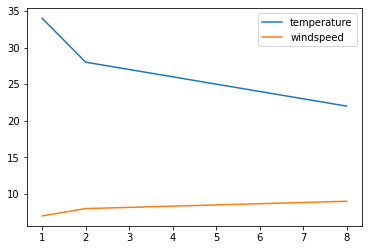

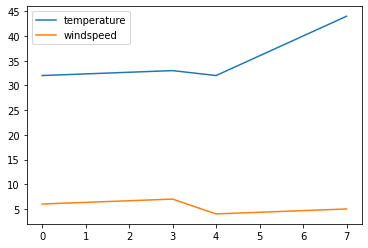

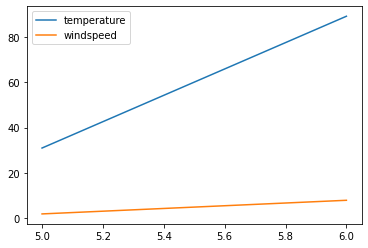

In [529]:
g.plot()

# Concat Dataframe

In [530]:
bd_weather = pd.DataFrame({
    'city': ['manikganj', 'dhaka', 'gazipur'],
    'temperature': [32, 45, 67],
    'humidity': [80, 60, 78]
})
bd_weather

,city,temperature,humidity
0,manikganj,32,80
1,dhaka,45,60
2,gazipur,67,78


In [531]:
in_weather = pd.DataFrame({
    'city': ['mumbai', 'delhi', 'banglore'],
    'temperature': [23, 20, 48],
    'humidity': [88, 20, 87]
})
in_weather

,city,temperature,humidity
0,mumbai,23,88
1,delhi,20,20
2,banglore,48,87


In [532]:
df = pd.concat([bd_weather, in_weather])
df

,city,temperature,humidity
0,manikganj,32,80
1,dhaka,45,60
2,gazipur,67,78
0,mumbai,23,88
1,delhi,20,20
2,banglore,48,87


In [533]:
df = pd.concat([bd_weather, in_weather], ignore_index=True)
df

,city,temperature,humidity
0,manikganj,32,80
1,dhaka,45,60
2,gazipur,67,78
3,mumbai,23,88
4,delhi,20,20
5,banglore,48,87


In [534]:
df = pd.concat([bd_weather, in_weather], keys=['Bangladesh', 'India'])
df

city  temperature  humidity
Bangladesh 0  manikganj           32        80
           1      dhaka           45        60
           2    gazipur           67        78
India      0     mumbai           23        88
           1      delhi           20        20
           2   banglore           48        87

In [535]:
df.loc['India']

,city,temperature,humidity
0,mumbai,23,88
1,delhi,20,20
2,banglore,48,87


In [536]:
temperature_df = pd.DataFrame({
    'city': ['mumbai', 'delhi', 'banglore'],
    'temperature': [23, 20, 48], 
})
temperature_df

,city,temperature
0,mumbai,23
1,delhi,20
2,banglore,48


In [537]:
windspeed_df = pd.DataFrame({
    'city': ['mumbai', 'delhi', 'banglore'],
    'windspeed': [8, 7, 9], 
})
windspeed_df

,city,windspeed
0,mumbai,8
1,delhi,7
2,banglore,9


In [538]:
df = pd.concat([windspeed_df, temperature_df])
df

,city,windspeed,temperature
0,mumbai,8.0,NaN
1,delhi,7.0,NaN
2,banglore,9.0,NaN
0,mumbai,NaN,23.0
1,delhi,NaN,20.0
2,banglore,NaN,48.0


In [539]:
df = pd.concat([windspeed_df, temperature_df], axis= 1)
df

,city,windspeed,city,temperature
0,mumbai,8,mumbai,23
1,delhi,7,delhi,20
2,banglore,9,banglore,48


In [540]:
s = pd.Series(['Humid', 'Dry', 'Snow'], name='event')
s

0    Humid
1      Dry
2     Snow
Name: event, dtype: object

In [541]:
df = pd.concat([temperature_df, s], axis= 1)
df

,city,temperature,event
0,mumbai,23,Humid
1,delhi,20,Dry
2,banglore,48,Snow


# Merge Dataframe


1.   Inner join
2.   Outer join
3.   Left join
4.   Suffix



**Inner Join**

*Merge dataframe where same city name

In [542]:
df1 = pd.DataFrame({
    'city': ['chicago', 'new york', 'orlando'],
    'temperature': [21, 14, 35]
})
df1

,city,temperature
0,chicago,21
1,new york,14
2,orlando,35


In [543]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","orlando"],
    "humidity": [65,68,75],
})
df2

,city,humidity
0,chicago,65
1,new york,68
2,orlando,75


In [544]:
df3 = pd.merge(df1, df2, on='city')
df3

,city,temperature,humidity
0,chicago,21,65
1,new york,14,68
2,orlando,35,75


In [545]:
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando", "baltimore"],
    "temperature": [21,14,35, 38],
})
df1

,city,temperature
0,new york,21
1,chicago,14
2,orlando,35
3,baltimore,38


In [546]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","san diego"],
    "humidity": [65,68,71],
})
df2

,city,humidity
0,chicago,65
1,new york,68
2,san diego,71


In [547]:
df3 = pd.merge(df1, df2, on='city')
df3

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65


In [548]:
df3 = pd.merge(df1, df2, on='city', how='inner')
df3

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65


**Outer Join**

In [549]:
df3 = pd.merge(df1, df2, on='city', how='outer')
# join all
df3

,city,temperature,humidity
0,new york,21.0,68.0
1,chicago,14.0,65.0
2,orlando,35.0,NaN
3,baltimore,38.0,NaN
4,san diego,NaN,71.0


**Left Join**

In [550]:
df3 = pd.merge(df1, df2, on='city', how='left')
# left all right condition
df3

,city,temperature,humidity
0,new york,21,68.0
1,chicago,14,65.0
2,orlando,35,NaN
3,baltimore,38,NaN


In [551]:
df3 = pd.merge(df1, df2, on='city', how='right')
# right all left condition
df3

,city,temperature,humidity
0,new york,21.0,68
1,chicago,14.0,65
2,san diego,NaN,71


In [552]:
df3 = pd.merge(df1, df2, on='city', how='outer', indicator=True)
# show the join type
df3

,city,temperature,humidity,_merge
0,new york,21.0,68.0,both
1,chicago,14.0,65.0,both
2,orlando,35.0,NaN,left_only
3,baltimore,38.0,NaN,left_only
4,san diego,NaN,71.0,right_only


**Suffix**

In [553]:
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando", "baltimore"],
    "temperature": [21,14,35,38],
    "humidity": [65,68,71, 75]
})
df1

,city,temperature,humidity
0,new york,21,65
1,chicago,14,68
2,orlando,35,71
3,baltimore,38,75


In [554]:

df2 = pd.DataFrame({
    "city": ["chicago","new york","san diego"],
    "temperature": [21,14,35],
    "humidity": [65,68,71]
})
df2

,city,temperature,humidity
0,chicago,21,65
1,new york,14,68
2,san diego,35,71


In [555]:
df3= pd.merge(df1,df2,on="city",how="outer", suffixes=('_first','_second'))
df3

,city,temperature_first,humidity_first,temperature_second,humidity_second
0,new york,21.0,65.0,14.0,68.0
1,chicago,14.0,68.0,21.0,65.0
2,orlando,35.0,71.0,NaN,NaN
3,baltimore,38.0,75.0,NaN,NaN
4,san diego,NaN,NaN,35.0,71.0


# Pivot & pivot_table
pivot allows you to transform or reshape data